# Disneyland - Attraction Clustering
![Disneyland Resort Map](http://www.magicalkingdoms.com/dlc/photos/maps/resortarea.png)

## Introduction/Business Problem
The Disneyland Resort in California, at an [estimated 510 acres](https://www.getawaytoday.com/travel-blog/disneyland-vs-disney-world-part-one), consists of 2 seperate themeparks. Disneyland and California Adventure, spanning [85 and 75 acres respectively](https://www.adventurestudenttravel.com/8-differences-between-disneyland-and-disneys-california-adventure/), they are some of the most sought after tourist destinations in the world. The Disneyland park alone averages around [50,000 visitors daily](https://www.ocregister.com/2019/07/02/7-reasons-why-disneyland-feels-less-crowded-this-summer-after-the-opening-of-star-wars-galaxys-edge/). Navigating such a large/crowded environment can be a daunting and overwheiming experience for first time visitors, especially when they aren't certain as to which kind of attraction they aim to see or are available to them. So here in lies the problem...

_**How can a Disneyland first-timer better understand where to spend there time?**_

## Data
For now, the scope of this project will be limited to the rides available in both parks of The Disneyland Resort in California. Future installments can be modified to include shops, eateries, and other attractions at any number of the Disney Park locations around the world.

Some data requirments need for this project include:
    1. Ride location
    2. Wait Time
    3. Ride Type (i.e roller-coaster, monorail, go-cart)
    4. Ride Length
    5. Ride Rating
    
Additional datapoints that could prove useful may include:
    - Height Requirements
    - Whether or not a ride will wet passengers
    
Utilizing the datapoints listed above, the rides will be clustered together using a machine learning clustering algorithm (k-means), so that a user can have a better understanding of which section of the park the may enjoy.

# Project Overview
1. Find/Fetch which attractions reside in Disneyland and California Adventure
2. Find/Fetch details about each attraction (i.e. wati time, type, length, rating)
3. Utilize Foursquare API to find location coordinates of each attraction
4. Implement a machine-learning clustering process (k-means) to group sections of the park based on attraction information 
___

In [ ]:
#!conda install -c conda-forge geopy --yes 
!conda install -c conda-forge folium=0.5.0 --yes

In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
import requests # library to handle requests
from bs4 import BeautifulSoup

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
#import folium # map rendering library

print('Libraries imported.')

Libraries imported.


# Part #1: Law of Attractions? - WebScraping
As stated, the first step of this project is to find out which attractions exist in the California Disneyland Resort location. This task can by accomplished in a multitude of methods. One such strategy, implemented in the following Jupyter Notebook, is to make use of the plethora of websties and databases dedicated to Disneyland Attractions.

_**Addendum:** Another approach involves using Foursquare's "explore" function to discover which venues exist in the Disneyland radius. However, this method, part of the first iteration of the project, proved to miss out on some of the attractions._

In [139]:
def scrape_wiki(wiki_url, lang, park):
    """ Accesses webpage, searches for table, converts/returns panda dataframe """
    
    all_sections = []
    all_attractions = []
    
    def is_tag( element ): return( str(type(element)) == "<class 'bs4.element.Tag'>" )
    def is_park_section( element ): return( is_tag(element) and 'mw-headline' in str(element) )
    def is_attraction( element ): return( is_tag(element) and ('<li><a href') in str(element) )
    
    
    
    def create_dataframe( soup ):
        df=pd.DataFrame(columns={'Attraction', 'Section'})
        element = soup.find('span', class_='mw-headline')
        section_name = ""
        
        for x in range(0,100):
            print(x)
            #print(element,'\n')
            if( is_park_section(element) ): # Is section of park
                section_name = element.text
                
            if( is_attraction(element) ):# Is attraction
                all_attractions.extend( [tag.text for tag in element.find_all('li')] )
                all_sections.extend( ([section_name]*len(all_attractions)) )
                print('len1 ', len(all_attractions))
                print('len2 ',len(all_sections))
                
                #print(f"*** Attraction: {attraction_name} -> {section_name}")
            
            print('Section Name: ', section_name)
            element = element.next
            
            
        """
            tag=tag.next
            
            for x in range(0,100):
                if tag.find('li'): # List item 
                        section_list = tag.find_all('li')
                        get_section_attractions(park_sections[section].text, section_list)

                        tag = tag.next

                if tag.find('span', class_='mw-headline'):
                    tag = tag.next
                    break

                tag = tag.next
            """
            
    response = requests.get(wiki_url)
    soup = BeautifulSoup(response.content, lang)
    
    create_dataframe( soup )
    
    

    

In [140]:
scrape_wiki('https://en.wikipedia.org/wiki/List_of_Disneyland_attractions', 
                 'html',
                 'Disneyland')
#scrape_wiki('https://en.wikipedia.org/wiki/List_of_Disney_California_Adventure_attractions', 
#                 'html',
#                 'California Adventure')

#df.append(df2, ignore_index=True)

0
Section Name:  Main Street, U.S.A.
1
Section Name:  Main Street, U.S.A.
2
Section Name:  Main Street, U.S.A.
3
Section Name:  Main Street, U.S.A.
4
Section Name:  Main Street, U.S.A.
5
Section Name:  Main Street, U.S.A.
6
Section Name:  Main Street, U.S.A.
7
Section Name:  Main Street, U.S.A.
8
Section Name:  Main Street, U.S.A.
9
Section Name:  Main Street, U.S.A.
10
len1  5
len2  5
Section Name:  Main Street, U.S.A.
11
len1  5
len2  10
Section Name:  Main Street, U.S.A.
12
Section Name:  Main Street, U.S.A.
13
Section Name:  Main Street, U.S.A.
14
Section Name:  Main Street, U.S.A.
15
len1  5
len2  15
Section Name:  Main Street, U.S.A.
16
Section Name:  Main Street, U.S.A.
17
Section Name:  Main Street, U.S.A.
18
Section Name:  Main Street, U.S.A.
19
len1  5
len2  20
Section Name:  Main Street, U.S.A.
20
Section Name:  Main Street, U.S.A.
21
Section Name:  Main Street, U.S.A.
22
Section Name:  Main Street, U.S.A.
23
Section Name:  Main Street, U.S.A.
24
Section Name:  Main Street, 

## TheLaughingPlace.com
The Laughing Place is a thrid-party website, not affiliated or endorsed by Disney, that is dedicated to providing potential visitors with information they may not be able to acces through mainstream disney services. This can invlude live and average wait times, refurbishment schedules and general updates regarding any of the parks.

### _List of Disneyland Attractions:_
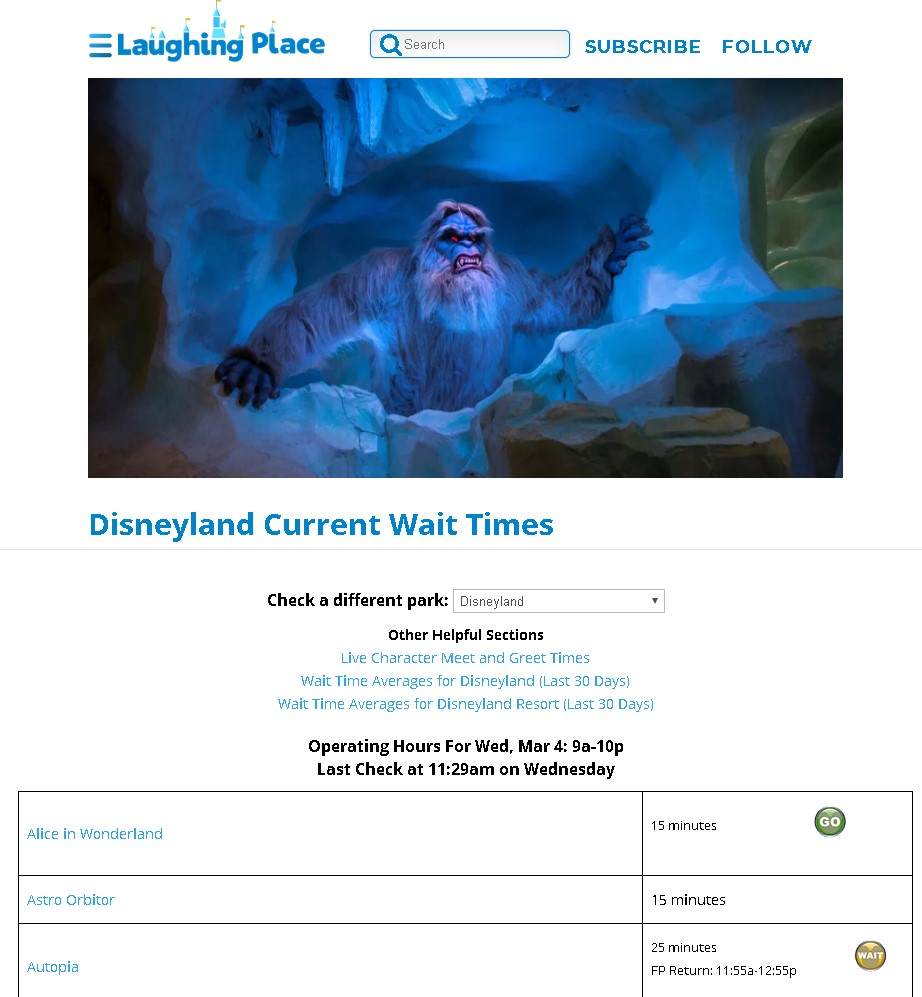

### _Disneyland Attraction Information:_
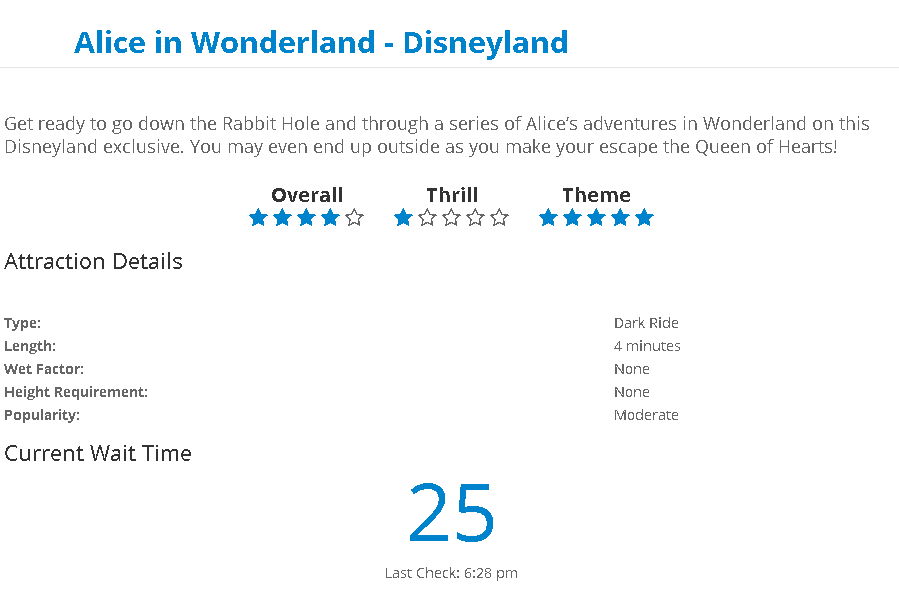

In [ ]:
def scrape_table(webpage_url, lang):
    """ Accesses webpage, searches for table, converts/returns panda dataframe """
        
    response = requests.get(webpage_url)
    soup = BeautifulSoup(response.content, lang)
    
    table = soup.find('table').find_all('tr') # Get Table
    
    attraction_names = []
    wait_times = []
    links = []
    
    for row in table:
        cell_data = row.find_all('td')
        row_data = [i.text for i in cell_data]
        #print("\n", row_data)
        #print(row)
        
        if row.find('span'): # Filters only displayed rows
            
            """ Rows w/ Icons display wait times differently"""
            if row.find('table'): # Row has table/icon
                wait = row.find('table').find_all('td')[0]
                wait_times.append( wait.string )
            else:
                wait = row_data[1]
                wait_times.append( wait.split('F')[0] ) # Removes Fast-Pass info
                
            """ Rows w/ Hyperlinks display names differently"""
            if row.find('a'): # Ride (has hyperlink)
                    attraction_url = row.find('a')
                    attraction_names.append( attraction_url.text )
                    links.append( attraction_url['href'] )
                    #print(f"Link: {attraction_url.text}")

            elif row.find('a') == None: # Ride (no hyperlink)
                    name = row.find_all('td')[0]
                    attraction_names.append( name.string )
                    links.append( np.nan )
                    #print(f"No Link: {name.text}")
                    
    df = pd.DataFrame()
    df['Attraction'] = attraction_names
    df['Wait Time'] = wait_times
    df['URL'] = links
    return(df)

In [ ]:
def get_disney_attractions(location):
    """ Collects Attraction names by calling helper methods, returns panda dataframe """
    
    def get_attractions(park):
        """ Getting ride name, wait times, & links """
        attractions = scrape_table(f"https://www.laughingplace.com/w/p/{park}-current-wait-times/", 'lxml')
        return(attractions)
    
    if location == 'California':
        disland_attractions = get_attractions('disneyland')
        disland_attractions['Park'] = 'Disneyland'
        print('Disneyland Attractions: ', disland_attractions.shape)

        caladv_attractions = get_attractions('disney-california-adventure')
        caladv_attractions['Park'] = 'California Advewnture'
        print('Californa Advenutre Atractions: ', caladv_attractions.shape)

        all_attractions = disland_attractions.append( caladv_attractions, ignore_index=True )
        all_attractions.sort_values('Attraction') 
        all_attractions.drop_duplicates(subset = 'Attraction', keep = 'first', inplace = True)
        print('All (California) Disney Attractions: ', all_attractions.shape)
        return( all_attractions )
    
    else: return(pd.DataFrame())


In [ ]:
def get_attraction_info(attractions):
    """ Grabs details from individual ride webpages """
        
    def get_attraction_type(soup): return( soup.find_all('td')[1].string )
    def get_attraction_length(soup): return( soup.find_all('td')[3].string )
    def get_attraction_wet_factor(soup): return( soup.find_all('td')[5].string )
    def get_attraction_height(soup): return( soup.find_all('td')[7].string )
    def get_attraction_popularity(soup): return( soup.find_all('td')[9].string )
    def get_attraction_description(soup): return( soup.find('div', class_="et_pb_text_inner").find('p').string  )
      
    print("\nGetting Attraction details. This may take several minutes...")  
    numRows = len(attractions.index)
    attraction_type = []
    attraction_length = []
    attraction_wet_factor = []
    attraction_height = []
    attraction_popularity = []
    attraction_description =[]
    
    for row in attractions.index:
        url = attractions['URL'][row]
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html')
        
        attraction_type.append( get_attraction_type( soup ) )
        attraction_length.append( get_attraction_length( soup ) )
        attraction_wet_factor.append( get_attraction_wet_factor( soup ) )
        attraction_height.append( get_attraction_height( soup ) )
        attraction_popularity.append( get_attraction_popularity( soup ) )
        attraction_description.append( get_attraction_description( soup ) )
        
        #print(attractions['Attraction'][row], attraction_type)
        print("# of Attractions remaining: ", numRows)
        numRows-=1
        
    attractions['Type'] = attraction_type
    attractions['Length'] = attraction_length
    attractions['Wet Factor'] = attraction_wet_factor
    attractions['Height'] = attraction_height
    attractions['Popularity'] = attraction_popularity
    attractions['Description'] = attraction_description
        
    return(attractions)

### _Main: Getting Attraction Names and Inforamation_

In [ ]:
disneycali_attractions = get_disney_attractions('California')
disneycali_attractions

In [ ]:
disneycali_attractions = get_attraction_info( disneycali_attractions.dropna(subset=['URL']) ) # Only 
disneycali_attractions.head()

# Part #2: Oh where, Foursquare, Have my Disney Rides Gone? 

In [ ]:
def get_attractions_coord(attractions, main_lat, main_long): 
    CLIENT_ID = 'VEAIOFCL32KKANBCMD5IINMJSEQNWLIZIPCXJNBUEVMISVZG' # your Foursquare ID
    CLIENT_SECRET = '4CKLDNC4F1U5F5DPUSD0RRS2OBTLMZJHLTMWL0FYKV4LVJQH' # your Foursquare Secret
    VERSION = '20180605' # Foursquare API version
    
    latitudes = []
    longitudes = []
    
    for row in attractions.index:
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&query={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            main_lat, 
            main_long,
            str(attractions['Attraction'][row]))

        # make the GET request
        results = requests.get(url).json()
        json_venue = results['response']['venues'][0]
        print( f"Sent: {attractions['Attraction'][row]}" )
        print( f"Recieved: {json_venue['name']}, {json_venue['location']['lat']}, {json_venue['location']['lng']}\n" )
    
        latitudes.append( json_venue['location']['lat'] )
        longitudes.append( json_venue['location']['lng'] )
    
    attractions['Latitude'] = latitudes
    attractions['Longitude'] = longitudes
        
    return(attractions)

### _Main: Getting Attraction Laititude and Longitude_

In [ ]:
disneyland_lat = 33.8121
disneyland_long = -117.9190

disneycali_attractions = get_attractions_coord( disneycali_attractions, disneyland_lat, disneyland_long )
disneycali_attractions

In [ ]:
map_disneyland = folium.Map(location=[disneyland_lat, disneyland_long], zoom_start=14)

# add markers to map
for lat, lng, name in zip(disneycali_attractions['Latitude'], disneycali_attractions['Longitude'], disneycali_attractions['Attraction']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_disneyland)  
    
map_disneyland


# Part #3: Every Kiss begins with Goo Goo Clusters

In [ ]:
# one hot encoding
disneycali_onehot = pd.get_dummies(disneycali_attractions[['Popularity']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
disneycali_onehot['Type'] = disneycali_attractions['Type'] 

# move neighborhood column to the first column
fixed_columns = [disneycali_onehot.columns[-1]] + list(disneycali_onehot.columns[:-1])
disneycali_onehot = disneycali_onehot[fixed_columns]

disneycali_onehot.head()

### _Most Common Attractions¶_

In [ ]:
disneycali_grouped = disneycali_onehot.groupby('Attraction').mean().reset_index()
disneycali_grouped.head()

In [ ]:
def return_most_common_attractions(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [ ]:
num_top_attractions = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Type']
for ind in np.arange(num_top_attractions):
    try:
        columns.append('{}{} Most Common Attraqction'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Attraqction'.format(ind+1))

# create a new dataframe
attractions_sorted = pd.DataFrame(columns=columns)
attractions_sorted['Type'] = disneycali_grouped['Type']

for ind in np.arange(disneycali_grouped.shape[0]):
    attractions_sorted.iloc[ind, 1:] = return_most_common_attractions(disneycali_grouped.iloc[ind, :], num_top_attractions)

attractions_sorted.head()

In [ ]:
# set number of clusters
kclusters = 4

disneycali_grouped_clustering = disneycali_grouped.drop('Type', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(disneycali_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

In [ ]:
# add clustering labels
attractions_sorted.insert(0, 'Cluster Labels', kmeans.labels_, allow_duplicates=False)

disneycali_merged = disneycali_attractions

# merge toronto_grouped with toronto_data to add latitude/longitude for each Attraction
disneycali_merged = disneycali_merged.join(attractions_sorted.set_index('Type'), on='Type')

disneycali_merged.head() # check the last columns!

In [ ]:
# create map
map_clusters = folium.Map(location=[disneyland_lat, disneyland_long], zoom_start=14)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(disneycali_merged['Latitude'], disneycali_merged['Longitude'], disneycali_merged['Type'], disneycali_merged['Cluster Labels'].astype(int)):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters